In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as scp
sns.set_style("darkgrid")

In [2]:
# read 2013 carrot data
raw_carrots_data = pd.read_html('carrots_2013.html', header=0)[0]

for i in [2014, 2015, 2016, 2017]:
    raw_carrots_data_new = pd.read_html('carrots_'+str(i)+'.html', header=0)[0]
    raw_carrots_data = pd.concat([raw_carrots_data, raw_carrots_data_new])

In [3]:
# number of unique entries in a column
raw_carrots_data['Origin'].unique()

array(['CALIFORNIA', 'MICHIGAN', 'CANADA', 'MEXICO', 'GEORGIA', 'ISRAEL',
       'ARIZONA', 'TEXAS', 'COSTA RICA', 'FLORIDA', 'NEW YORK',
       'COLORADO', nan, 'GUATEMALA', 'FRANCE'], dtype=object)

In [4]:
# most common city filter
freq_city = raw_carrots_data['City Name'].value_counts().idxmax()
carrots_data = raw_carrots_data[raw_carrots_data['City Name']==freq_city]
carrots_data.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Offerings,Market Tone,Price Comment,Comments
0,CARROTS,NEW YORK,NaN,sacks 48 1-lb film bags,TOPPED,NaN,NaN,06/03/2013,18.0,20.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,MEXICO 50LBS JUMBO SLIGHTLY HIGHER.,NaN,NaN
1,CARROTS,NEW YORK,NaN,sacks 48 1-lb film bags,TOPPED,NaN,NaN,06/04/2013,18.0,20.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.,NaN,NaN
2,CARROTS,NEW YORK,NaN,sacks 48 1-lb film bags,TOPPED,NaN,NaN,06/05/2013,18.0,20.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.,NaN,NaN
3,CARROTS,NEW YORK,NaN,sacks 48 1-lb film bags,TOPPED,NaN,NaN,06/06/2013,18.0,20.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,STEADY.,NaN,NaN
4,CARROTS,NEW YORK,NaN,sacks 48 1-lb film bags,TOPPED,NaN,NaN,06/07/2013,18.0,20.0,...,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.,NaN,NaN


In [5]:
# for carrots, variety (baby vs topped vs bunched) is the big distinguisher
freq_variety = carrots_data['Variety'].value_counts().idxmax()
#freq_pack = carrots_data['Package'].value_counts().idxmax()

In [6]:
# strip down to most common variety
carrots_data = carrots_data[carrots_data['Variety']==freq_variety]
#carrots_data = carrots_data[carrots_data['Package']==freq_pack]

In [7]:
# now compute the average price column and append
average_price = ((carrots_data['Low Price']+carrots_data['High Price'])*0.5).rename('Average Price')
carrots_data = pd.concat([carrots_data, average_price], axis=1)
carrots_data.head()

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Appearance,Storage,Crop,Repack,Trans Mode,Offerings,Market Tone,Price Comment,Comments,Average Price
0,CARROTS,NEW YORK,NaN,sacks 48 1-lb film bags,TOPPED,NaN,NaN,06/03/2013,18.0,20.0,...,NaN,NaN,NaN,N,NaN,NaN,MEXICO 50LBS JUMBO SLIGHTLY HIGHER.,NaN,NaN,19.0
1,CARROTS,NEW YORK,NaN,sacks 48 1-lb film bags,TOPPED,NaN,NaN,06/04/2013,18.0,20.0,...,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.,NaN,NaN,19.0
2,CARROTS,NEW YORK,NaN,sacks 48 1-lb film bags,TOPPED,NaN,NaN,06/05/2013,18.0,20.0,...,NaN,NaN,NaN,N,NaN,NaN,STEADY.,NaN,NaN,19.0
3,CARROTS,NEW YORK,NaN,sacks 48 1-lb film bags,TOPPED,NaN,NaN,06/06/2013,18.0,20.0,...,NaN,NaN,NaN,N,NaN,NaN,STEADY.,NaN,NaN,19.0
4,CARROTS,NEW YORK,NaN,sacks 48 1-lb film bags,TOPPED,NaN,NaN,06/07/2013,18.0,20.0,...,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.,NaN,NaN,19.0


In [8]:
# now compute the average price within each day
average_daily_price = carrots_data.groupby('Date', as_index=False)['Average Price'].mean()
average_daily_price.head()
    

,Date,Average Price
0,01/02/2014,14.916667
1,01/02/2015,21.666667
2,01/02/2018,22.000000
3,01/03/2017,14.600000
4,01/03/2018,22.000000


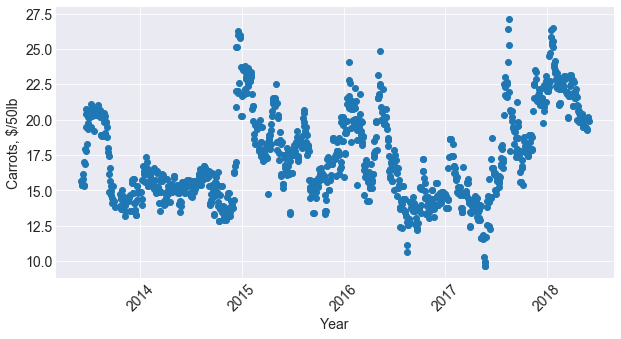

In [9]:
# plot average carrot price as function of time, color code top five countries (and other category)

plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)

datelist = pd.to_datetime(average_daily_price['Date'])
carrotplot = plt.plot_date(datelist, average_daily_price['Average Price'])

plt.xlabel('Year', fontsize=14)
plt.ylabel('Carrots, $/50lb', fontsize=14)

plt.savefig('Carrots_2013_2018.pdf', format='pdf', bbox_inches='tight')
plt.show()

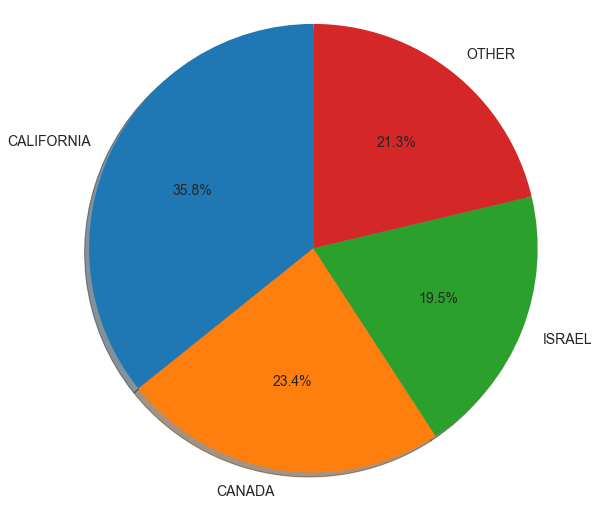

In [10]:
# plot where the carrots come from
freq_origin = carrots_data['Origin'].value_counts()

origins = list(freq_origin.index.values[:3])
origins.append('OTHER')

counts = list(freq_origin.values[:3])
counts.append(sum(freq_origin.values[3:]))

fig1, ax1 = plt.subplots(figsize=(9,9))
patches, texts, autotexts = ax1.pie(counts, labels=origins, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
[ _.set_fontsize(14) for _ in texts ]
[ _.set_fontsize(14) for _ in autotexts ]

plt.savefig('Carrots_sources.pdf', format='pdf', bbox_inches='tight')

plt.show()
